 * **Finding relationships most correlated columns**
 * **Finding the most busy city, payment type, branch**
 * **Visualizing a Gender based comparison for different product type**
 * **Visualizing a City based comparison for different product type**
 * **Finding which payment method is used more often at a particular city, branch and for which product type**
 * **Finding which branch has a better sale for which product**
 


# **DATA EXPLORATION AND CLEANING**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
sales.shape # To check number of rows and columns

(1000, 17)

In [5]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Well here date is object , let's convert it into Datetime

In [7]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [8]:
sales['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [9]:
sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

Finally , we have changed date to datetime from object

In [10]:
sales.set_index('Date',inplace =True)

In [11]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
sales.describe()  # Statistical Summary

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [13]:
sales.isnull().sum() # To check null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Lets's first handle Unit Price column by using mean value

In [14]:
avg_unit_price = sales["Unit price"].astype("float").mean(axis=0)
sales["Unit price"].replace(np.nan, avg_unit_price, inplace=True)

For Quantity we will use Mode value

In [15]:
from scipy import stats
mode=stats.mode(sales['Quantity'])

print(mode)

ModeResult(mode=array([10]), count=array([119]))


In [16]:
sales['Quantity'].replace(np.nan, "mode", inplace=True)

For rest remaining values we will simply drop them

In [17]:
sales.dropna(inplace=True)

In [18]:
sales.isnull().sum() # Finally we can see No null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [19]:
sales.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000e+00,1.077756e-02,6.339621e-01,6.339621e-01,6.339621e-01,-6.998957e-16,6.339621e-01,-8.777507e-03
Quantity,1.077756e-02,1.000000e+00,7.055102e-01,7.055102e-01,7.055102e-01,-3.849075e-16,7.055102e-01,-1.581490e-02
Tax 5%,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Total,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02
cogs,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02
gross margin percentage,-6.998957e-16,-3.849075e-16,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15
gross income,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Rating,-8.777507e-03,-1.581490e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00


In [20]:
np.round(sales.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-0.0,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00


# **EXPLORATORY DATA ANALYSIS**

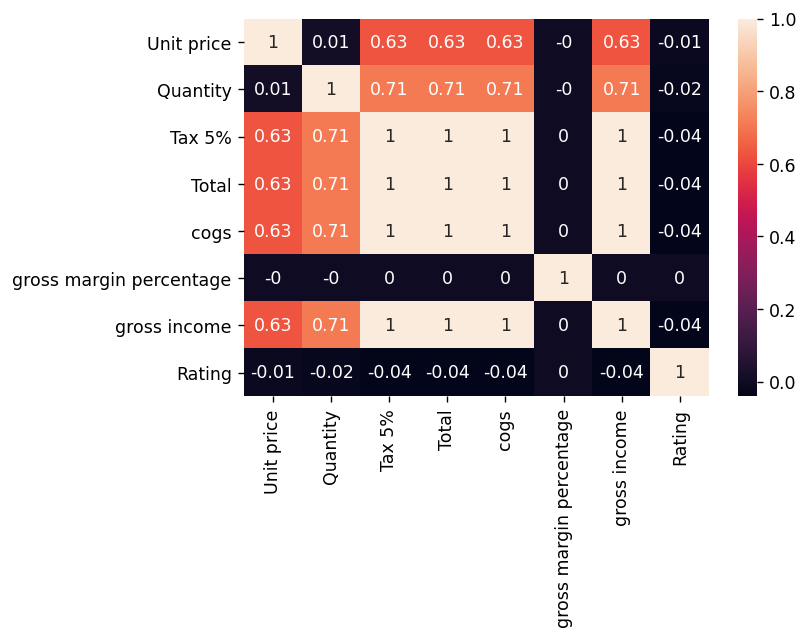

In [21]:
plt.figure(dpi=125)
sns.heatmap(np.round(sales.corr(),2),annot=True)
plt.show()

**The best correlated are Tax 5%, Total, Gross Income and cogs i.e Cost of Goods sold with a correlation of 1.**

**Also, the above mentioned all has a good correlation of 0.71 with Quantity**




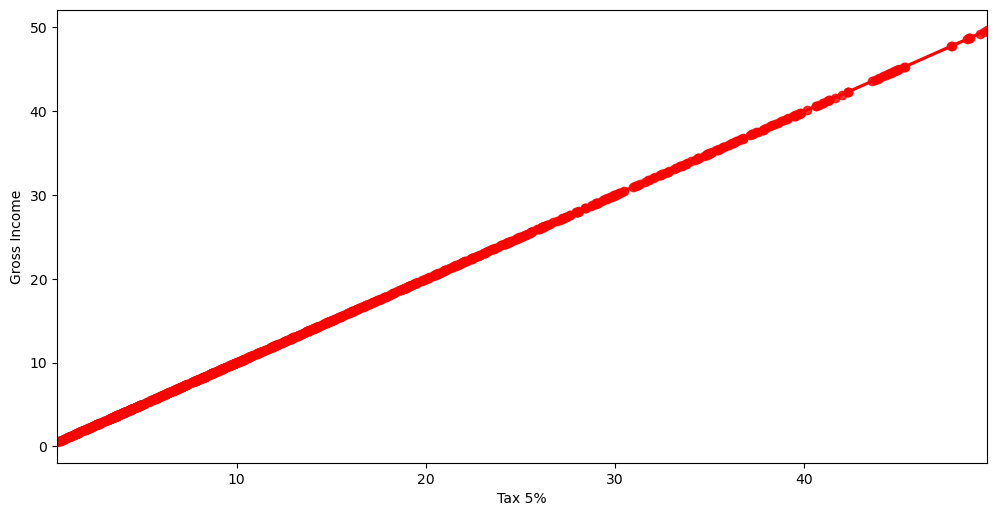

In [22]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=sales,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

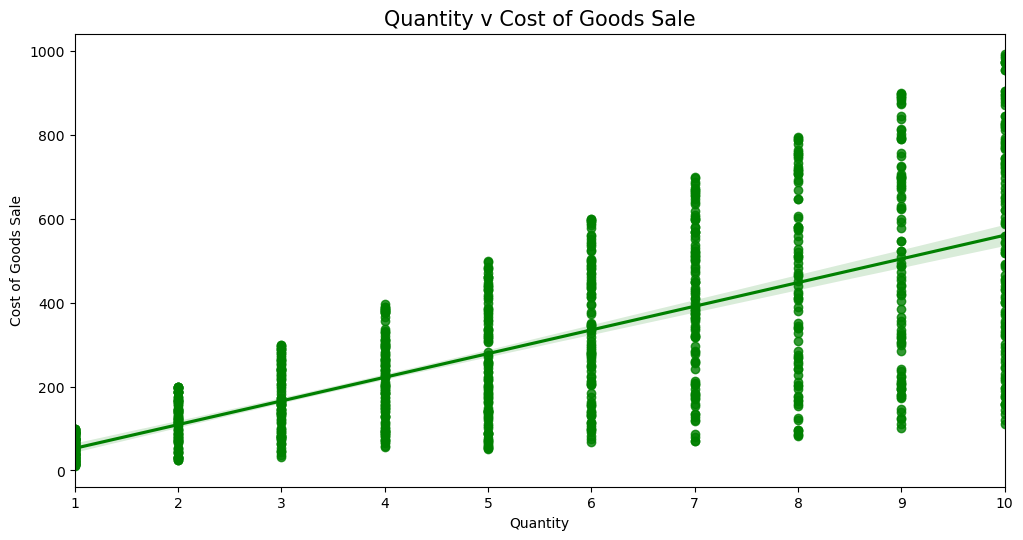

In [23]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=sales,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

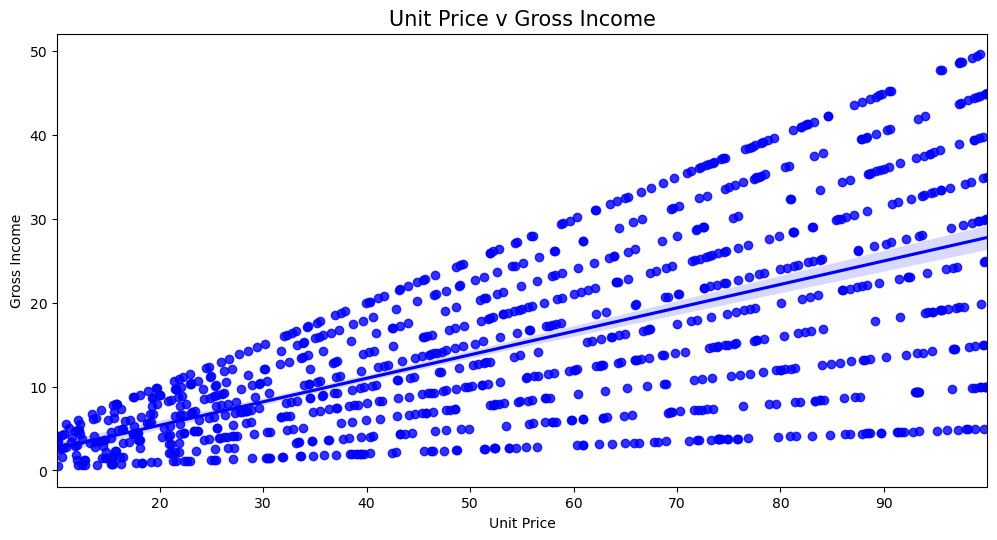

In [24]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=sales,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

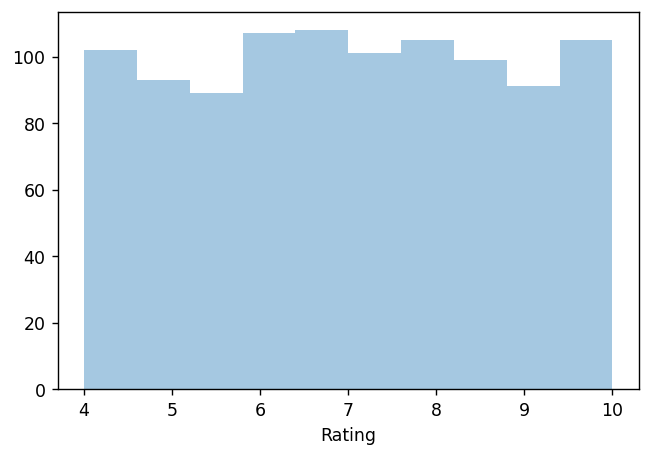

In [25]:
# To see the distribution of different ratings
plt.figure(dpi=125) 
sns.distplot(sales['Rating'],kde=False)
plt.show()

Let's find the mean rating now

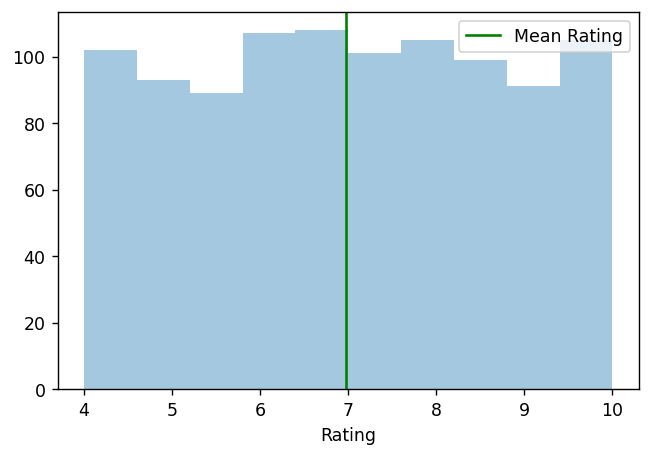

In [26]:
# To find Mean Rating
plt.figure(dpi=125)
sns.distplot(sales['Rating'],kde=False)
plt.axvline(x=np.mean(sales['Rating']),c='green',label='Mean Rating')
plt.legend()
plt.show()

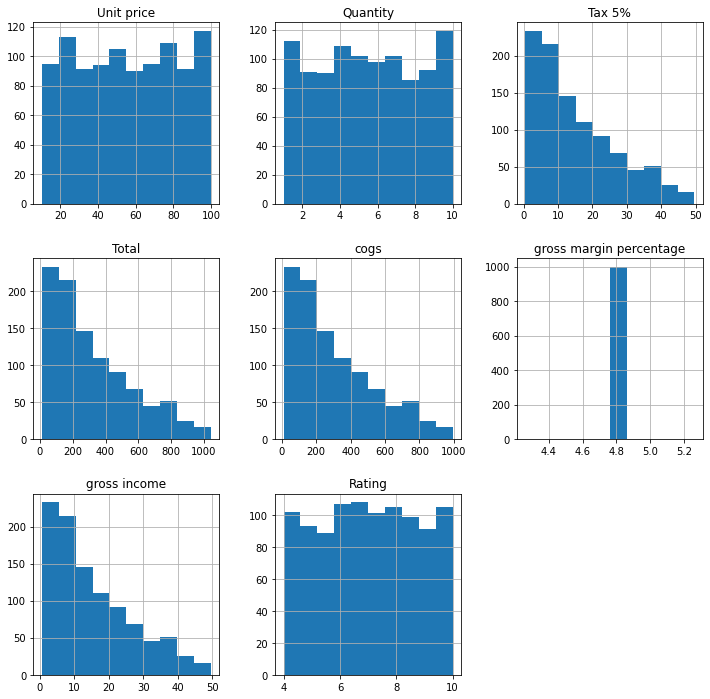

In [27]:
# Plotting Histogram for all
sales.hist(figsize=(12,12))
plt.show()

<h2 style='background:brown; border:0; color:white'><center>Analysis of Branch, City and Product Type</center><h2>

Branch A - 340
Branch B - 328
Branch C - 332


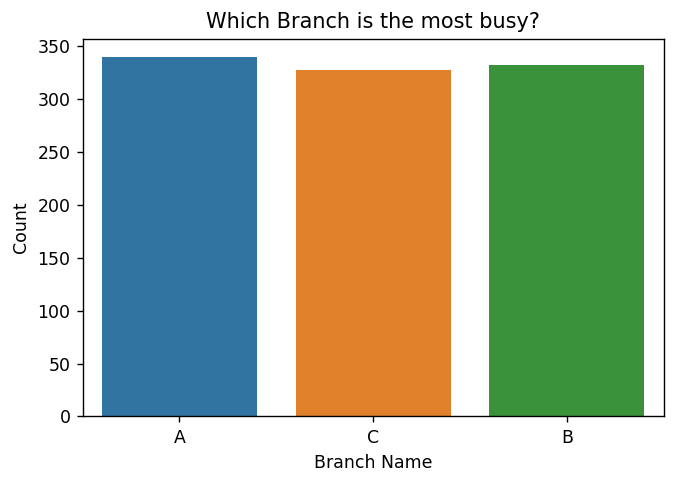

In [28]:
# Branch Count
plt.figure(dpi=125)
sns.countplot(sales['Branch'])
plt.xlabel('Branch Name')
plt.ylabel('Count')
plt.title('Which Branch is the most busy?')
A,B,C =sales.Branch.value_counts()

print('Branch A -',A)
print('Branch B -',C)
print('Branch C -',B)
      

plt.show()

E-wallet - 345
Cash - 344
Credit Card - 311


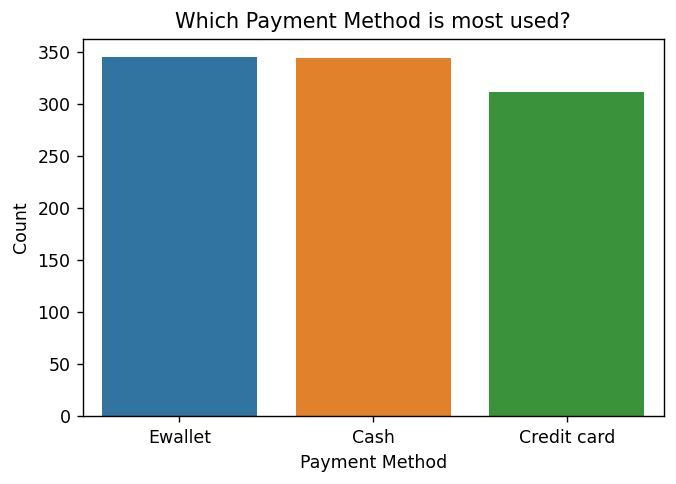

In [29]:
plt.figure(dpi=125)
sns.countplot(sales['Payment'])
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Which Payment Method is most used?')
A,B,C =sales.Payment.value_counts()

print('E-wallet -',A)
print('Cash -',B)
print('Credit Card -',C)
plt.show()

Yangon - 340
Naypyitow - 328
Mandalay - 332


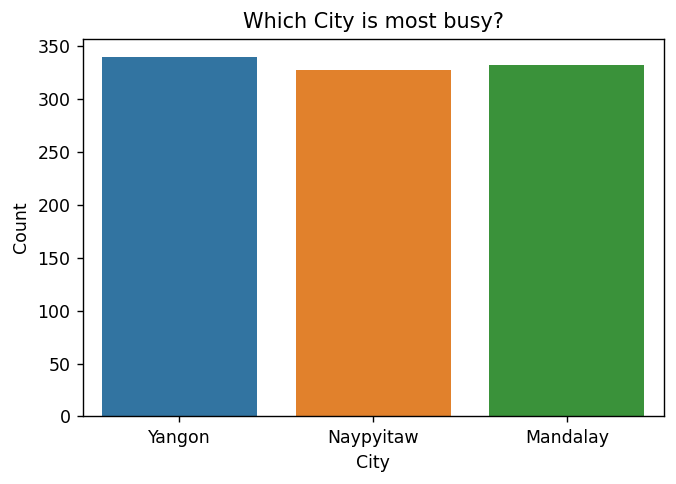

In [30]:
plt.figure(dpi=125)
sns.countplot(sales['City'])
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Which City is most busy?')
A,B,C =sales.City.value_counts()

print('Yangon -',A)
print('Naypyitow -',C)
print('Mandalay -',B)
plt.show()

Male- 499
Female - 501


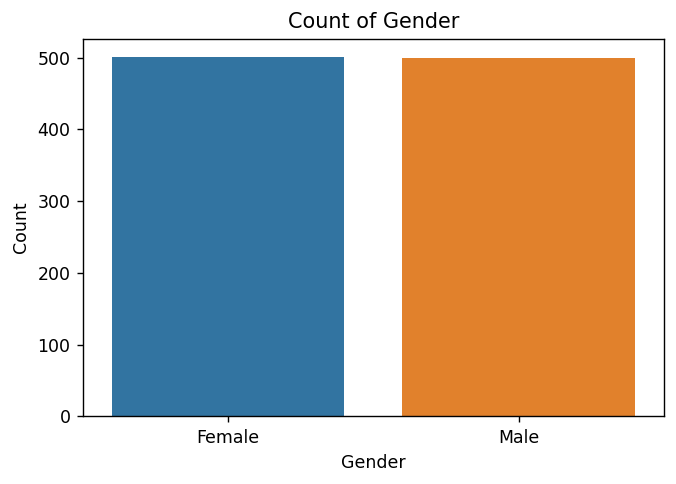

In [31]:
plt.figure(dpi=125)
sns.countplot(sales['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
A,B =sales.Gender.value_counts()

print('Male-',B)
print('Female -',A)

plt.show()

**Visualizing a Gender based comparison related to Product Type**

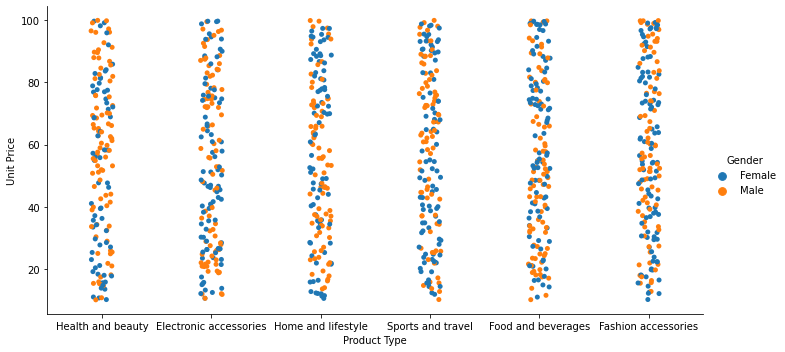

In [32]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=sales,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

**Isn't Jitter=False good to find the relation better ?**

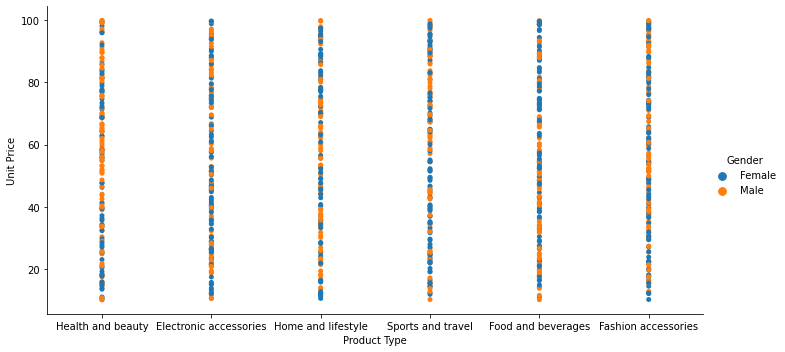

In [33]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=sales,aspect=2,jitter=False)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

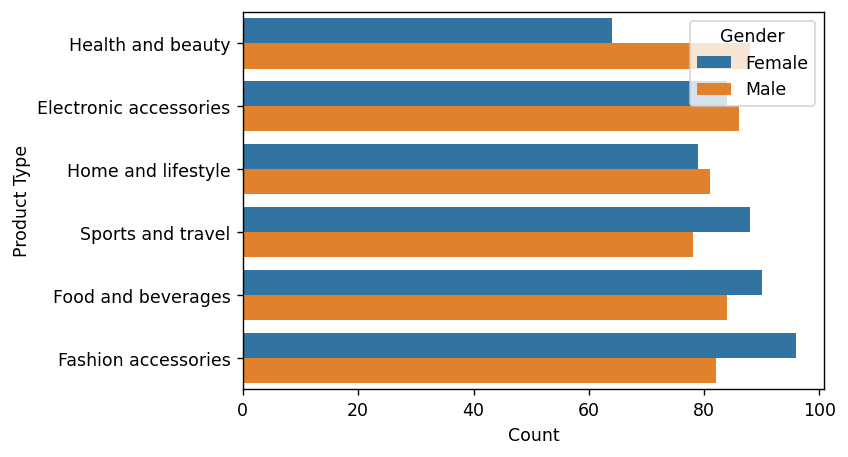

In [34]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

**Well, In Health & Beauty, Males are much more than Females whereas in Fashion accessories , Food & beverages and Sports & Travel Females are more and in the rest there is not much significant difference.**

**Visualizing a City based comparison related to Product Type**

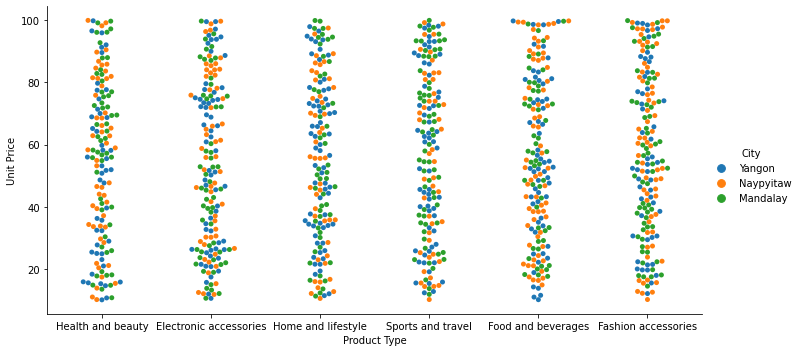

In [35]:
sns.catplot(x='Product line',y='Unit price',hue='City',kind='swarm',data=sales,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

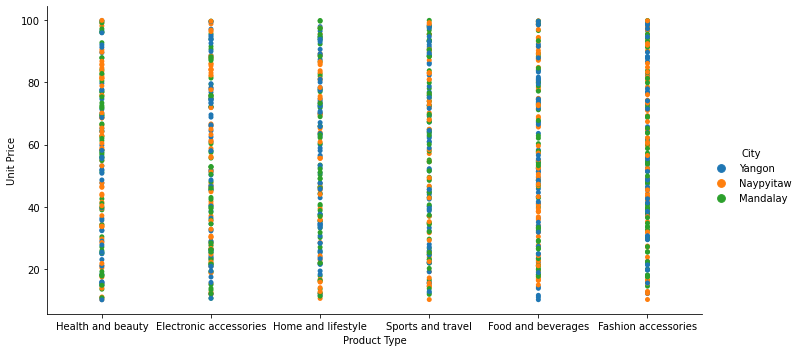

In [36]:
sns.catplot(x='Product line',y='Unit price',hue='City',data=sales,aspect=2,jitter=False)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

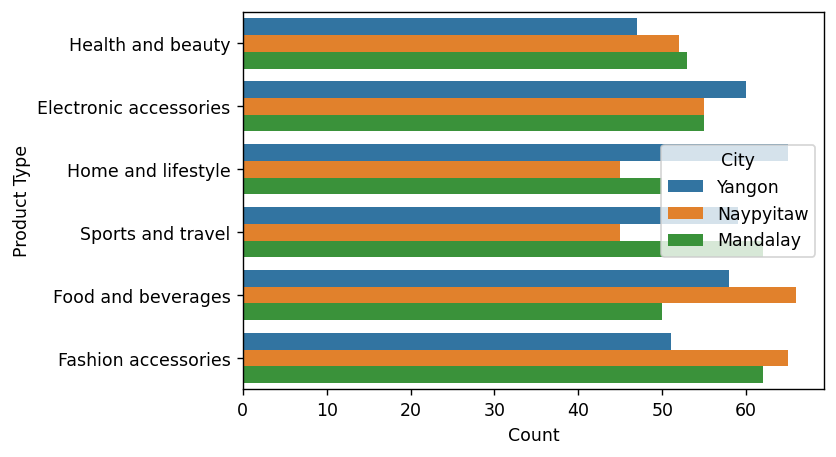

In [37]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

**Well, Yangon leads at Home & Lifestyle and Electronic accessories.**

**Naypyitaw leads at Food & Bevaerages and Fashion accessories.**

**Mandalay leads at Sports & Travel and Health & Beauty.**


**Finding the most used payment method for Product Type, Branch and City**

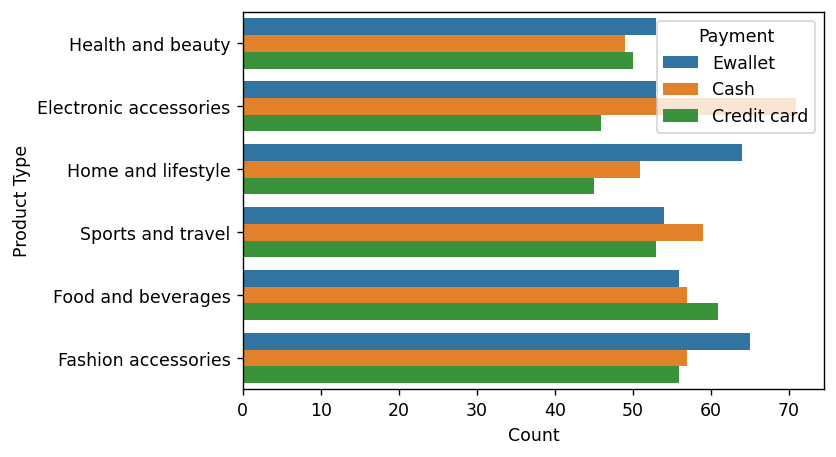

In [38]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Payment", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

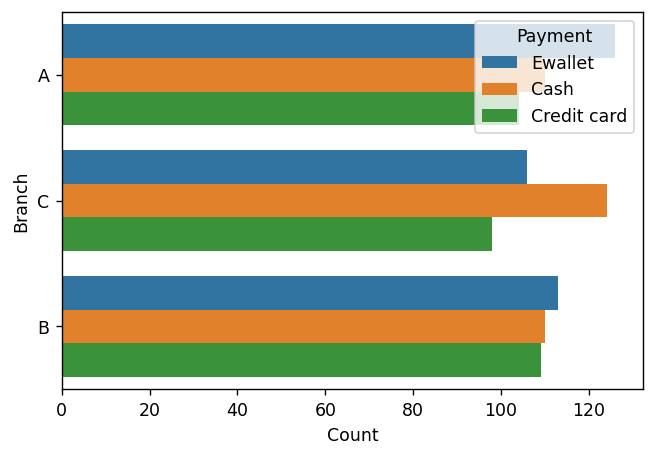

In [39]:
plt.figure(dpi=125)
sns.countplot(y ='Branch', hue = "Payment", data = sales) 
plt.xlabel('Count')
plt.ylabel('Branch')
plt.show()

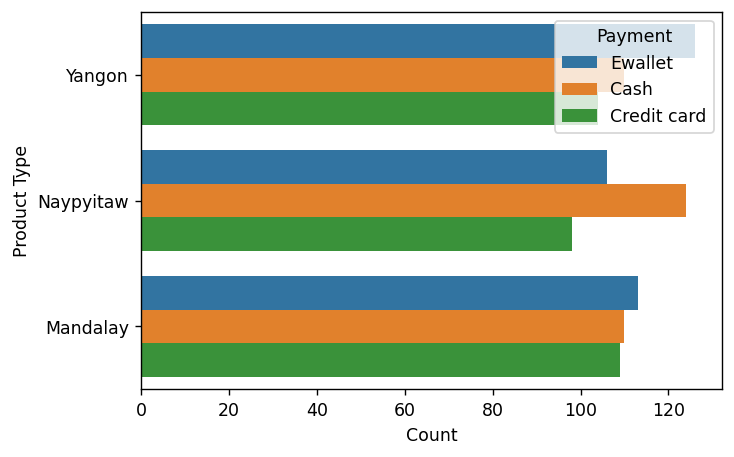

In [40]:
plt.figure(dpi=125)
sns.countplot(y ='City', hue = "Payment", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

**Finding Which Branch has better sale for a particular product type**

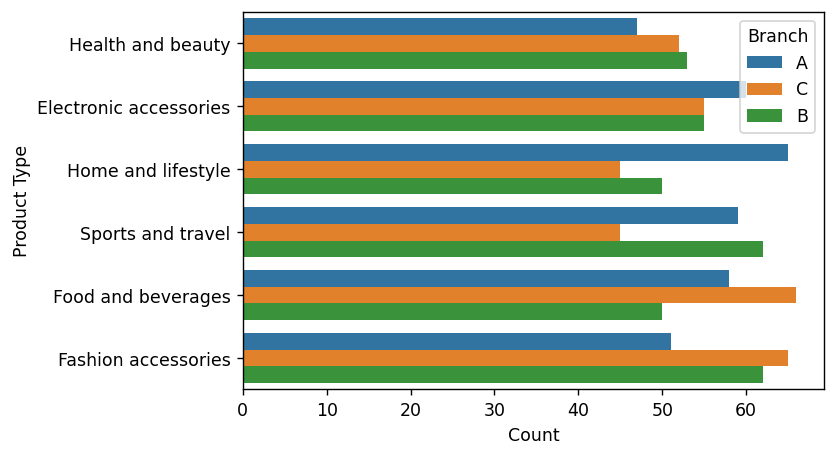

In [41]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Branch", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

**Boxen Plot for Rating and Quantity**

**What is Boxen Plot?**

**The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.**

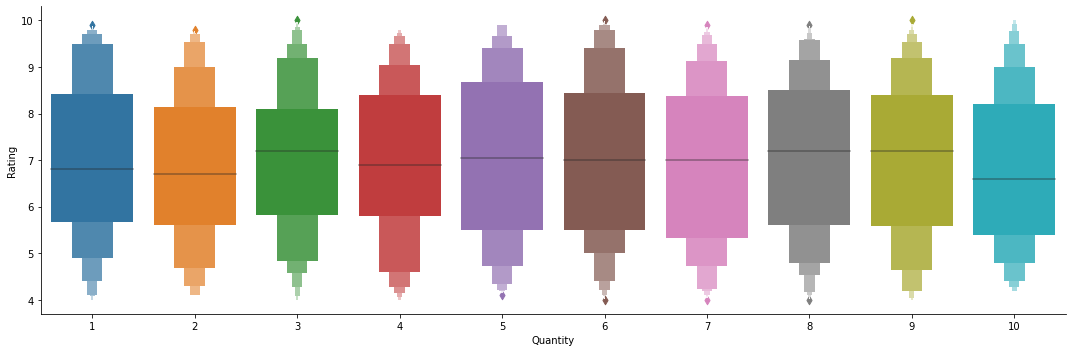

In [42]:

sns.catplot(y ='Rating',x='Quantity', data = sales,kind='boxen',aspect=3) 
plt.xlabel('Quantity')
plt.ylabel('Rating')
plt.show()

In [43]:
from wordcloud import WordCloud

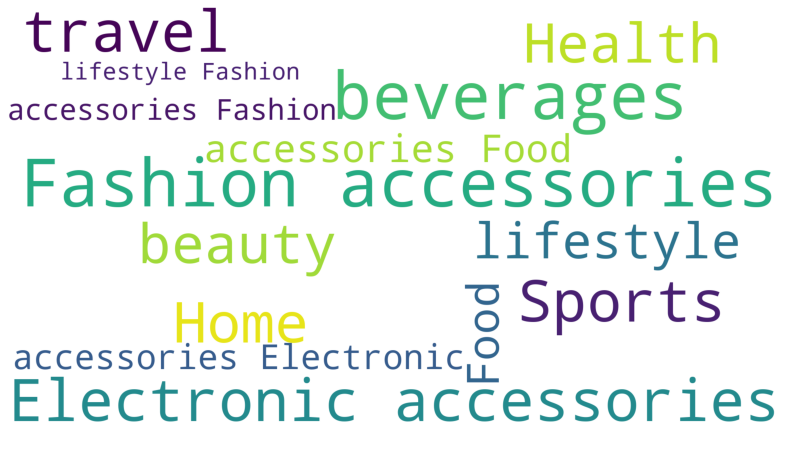

In [44]:
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(sales['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

<h2 style='background:black; border:0; color:white'><center>THANK YOU !</center><h2>